# Numerical Integration

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Riemann Sum, Trapezoidal Rule, Simpson's Rule

Remember that Riemann integrals can be defined as the limit of the Riemann sum for vanishing bin size. Thus, we can compute an integral by discretizing the input and performing the Riemann sum.

In [4]:
def riemann_int(x0, x1, f, h=.01):
    xs = np.arange(x0, x1, h)  # this excludes the point x1. This is correct since the last cotribution is given by f(x_{N-1}) * h for the left point rule
    ys = f(xs)
    return np.sum(h * ys)

def f(x):
    return x**2 + 1

print("Approximation:   {:.4f}".format(riemann_int(0., 2., f, h=.01)))
print("Analytic result: {:.4f}".format(1/3 * 2**3 + 2))

Approximation:   4.6467
Analytic result: 4.6667


In the above, we have used the left points $x_i$. We could've equally well used the mid points $x_i + h/2$ or the right points $x_i+1$. Since our function is convex, taking the left points consistently underestimates the actual volume.

Another possibility is to approximate the function by piecewise linear functions between $x$ and $x+h$ and sum up the trapezoids. This is why this is called the trapezoidal rule. The area of a trapezoid is given by 
$$\frac{f(x) + f(x+h)}{2} h$$

In [5]:
def trapezoid_int(x0, x1, f, h=.01):
    xs = np.arange(x0, x1 + .1 * h, h)  # the x1 + .1h ensures that we include the last point x_N
    ys = 1./2. * (f(xs[:-1]) + f(xs[1:]))  # the first term contains f(x_0),..., f(x_{N-1}), the second term contains f(x_1),..., f(x_{N})
    return np.sum(h * ys)

h=.1
print("Riemann Approximation: {:.4f}".format(riemann_int(0., 2., f, h=.1)))
print("Trapezoidal Rule:      {:.4f}".format(trapezoid_int(0., 2., f, h=.1)))
print("Analytic result:       {:.4f}".format(1/3 * 2**3 + 2))

Riemann Approximation: 4.4700
Trapezoidal Rule:      4.6700
Analytic result:       4.6667


Since our function is convex, the trapezoidal rule consistently over-estimates the volume. Even more accurate is Simpson's rule, which approximates the function by a quadratic function. In this sense, there is a family of methods that proceed by using increasing orders of polynomial approximations, from constant (Riemann sum), linear (Trapezoid), quadratic (Simpson), etc. This can be though ot as a Taylor expansion of the integrand up to that order. For Simpson, the area is approximated by
$$\frac16(f(x)+4f(x+h/2) + f(x+h))h$$

In [6]:
def simpson_int(x0, x1, f, h=.01):
    xs = np.arange(x0, x1 + .1 * h, h)  # the x1 + .1h ensures that we include the last point x_N
    ys = 1./6. * (f(xs[:-1]) + 4 * f(xs[:-1] + h/2) +  f(xs[1:]))
    return np.sum(h * ys)

h=.1
print("Riemann Approximation: {:.4f}".format(riemann_int(0., 2., f, h=.1)))
print("Trapezoidal Rule:      {:.4f}".format(trapezoid_int(0., 2., f, h=.1)))
print("Simpson Rule:          {:.4f}".format(simpson_int(0., 2., f, h=2)))
print("Analytic result:       {:.4f}".format(1/3 * 2**3 + 2))

Riemann Approximation: 4.4700
Trapezoidal Rule:      4.6700
Simpson Rule:          4.6667
Analytic result:       4.6667


Since our function is quadratic, the result is exact even with one step (h=2).

# Statistics and Random Numbers

## Drawing Random Numbers: Uniform Distribution

``Random" numbers on a computer are generated by *pseudo* random number generators (PRNGs). Since they are computed following an algorithm, they are not truely random, and it is difficult to make them "random enough". One can try to include randomness from environmental factors such as the number of seconds that have elapsed since 1970, the CPU temperature, etc. However, these give no guarantuee over how random the result will be.

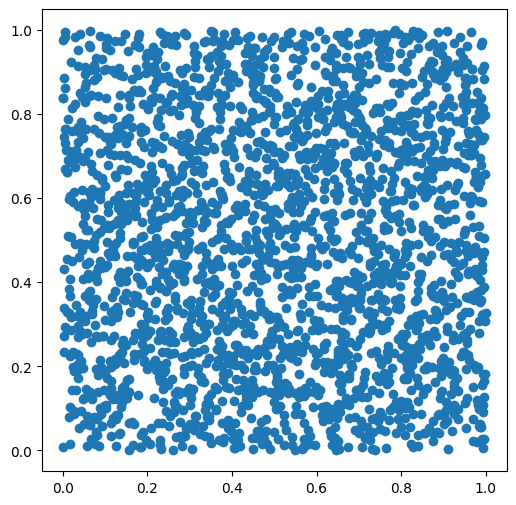

In [7]:
N = 5000
r = np.zeros(N+1)
bigint = 6537169170218971
coeff = 52361276312121
# bigint = 10
# coef = 3

seed = 1
r[0] = seed
for i in range(1, N+1):
    r[i] = (coeff * r[i-1]) % bigint

r1 = np.zeros(N//2)
r2 = np.zeros(N//2)
for i in range(0, N, 2):
    r1[i//2] = float(r[i]) / float(bigint)
    r2[i//2] = float(r[i+1]) / float(bigint)

plt.figure(figsize=(6, 6))
plt.scatter(r1, r2);

In [8]:
uniform_samples_in_r2 = np.random.uniform(low=0, high=100, size=(10, 10))
uniform_samples_in_r2[0]

array([74.32639687, 96.58021037, 62.77872154, 93.55350338, 78.57457077,
       40.18008787, 37.50437261, 42.34326851, 46.92796626, 26.4547734 ])

## Non-uniform random distributions

### Gaussian Distribution

A very important distribution is the Gaussian (or normal) distribution. It is defined by the first and second moment, i.e., the mean $\mu$ and variance $\sigma$, and reads
$$P(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac12\frac{(x-\mu)^2}{\sigma^2}}\,.$$
The normalization factor is such that 
$$\int_{-\infty}^{\infty} P(x)dx=1\,.$$
If points are sampled randomly from a Normal distribution, one typically writes $X\sim\mathcal{N}(\mu,\sigma^2)$.

The distribution is symmetric about the mean $\mu$, which is why the expectation value $E(x)=\langle x\rangle=\mu$. The variance $\sigma^2$ is such that, when sampling randomly from this distribution,
- 34.1% of the points are in the interval $[\mu,\mu+\sigma]$. Then 68.2% of the points are in the range $\mu\pm\sigma$ 
- 13.6% of the points are in the interval $[\mu+\sigma, \mu+2\sigma]$. Then 95.4% of the points are in the range $\mu\pm2\sigma$ 
- 2.1% of the points are in the interval $[\mu+\sigma, \mu+2\sigma]$. Then 99.6% of the points are in the range $\mu\pm3\sigma$
- ...

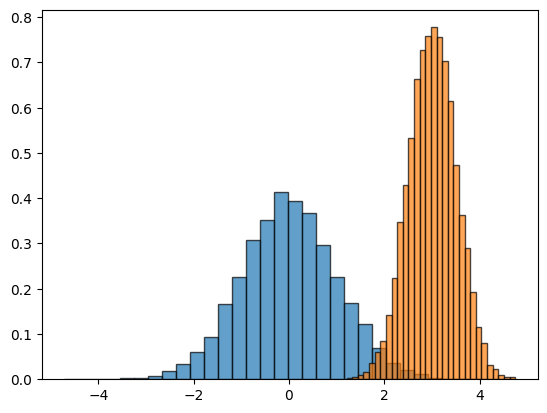

In [9]:
mu, sigma, N = 0, 1, 10000
r = np.random.normal(mu, sigma, N)
plt.hist(r, bins=30, density=True, alpha=0.7, edgecolor='black');
mu, sigma, N = 3, 1/2, 10000
r = np.random.normal(mu, sigma, N)
plt.hist(r, bins=30, density=True, alpha=0.7, edgecolor='black');
plt.show()

### Exponential distribution

As an example, let us take $y(x)=-\ln{(x)}$ with $P(x)$ representing a uniform distribution in the interval $[0,1]$. Then
$$P(x)dx=P(y)dy\quad\Leftrightarrow\quad P(y)=\frac{dx}{dy}=e^{-y},$$ 
which is distributed exponentially. This distribution occurs frequently in real problems such as the radioactive decay of nuclei. You can also see that the quantity $y/\kappa$ has the distribution $$P(y) = \kappa e^{-\kappa y}\,.$$

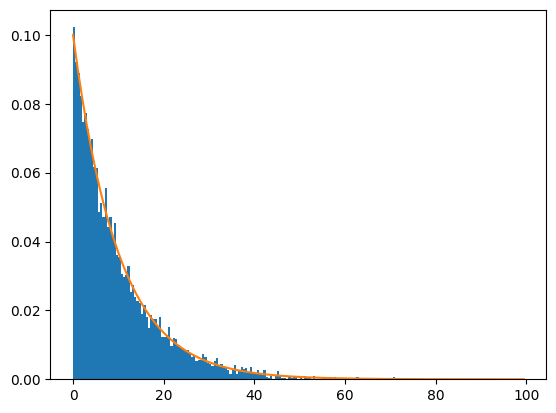

In [10]:
N = 10000
r = np.random.random(N)

kappa = 0.1
y = -np.log(r) / kappa

binwidth = 5 * kappa
plt.hist(y, bins=np.arange(0., 100., binwidth), density=True);
plt.plot(np.arange(0., 100., binwidth), kappa * np.exp(-kappa * np.arange(0, 100., binwidth)));


# Monte Carlo Integration

## Intro: How to (not) sample from the unit disk

Let us assume you want a uniformly distributed set of points on a circle. If you sample $x,y\sim\mathcal{U}(-1,1)$, you get a uniform distirbution on the square, similar to what we have seen in the first plot. One might naively think that going to spherical coordinates and sampling $r\sim\mathcal{U}(0,1)$, $\phi\sim\mathcal{U}(0,2\pi)$ could give a uniform point sample on the unit disk, but it does not since the transformation between the two coordinate systems is non-linear,
$$x=r\cos\phi\,,\qquad y=r\sin\phi.$$

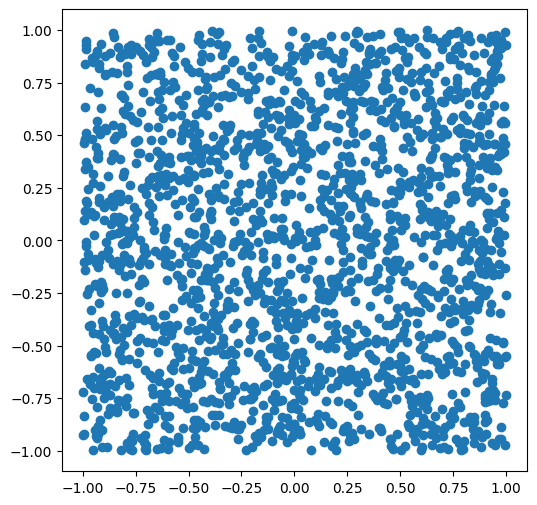

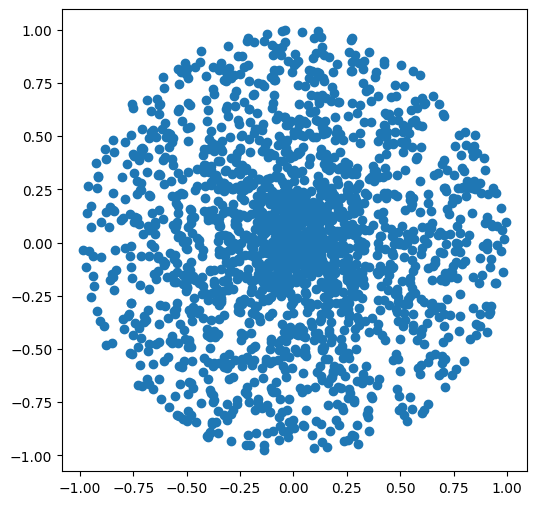

In [11]:
xs, ys = np.random.uniform(-1, 1, 2000), np.random.uniform(-1, 1, 2000)
rs, phis = np.random.uniform(0, 1, 2000), np.random.uniform(0, 2 * np.pi, 2000)

plt.figure(figsize=(6, 6))
plt.scatter(xs, ys)
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter([r * np.cos(phi) for r, phi in zip(rs, phis)], [r * np.sin(phi) for r, phi in zip(rs, phis)])
plt.show()

Instead, what one can do is to take the uniform sample on the square and throw away all points that are outside the disk. This is an example of rejection sampling.


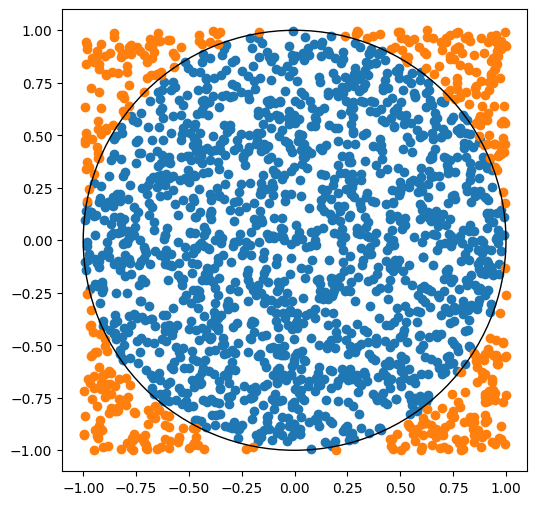

In [12]:
xdisk, ydisk = [], []
xout, yout = [], []
for x, y in zip(xs, ys):
    if np.sqrt(x**2 + y**2) <= 1:
        xdisk.append(x)
        ydisk.append(y)
    else:
        xout.append(x)
        yout.append(y)
plt.figure(figsize=(6, 6))
plt.scatter(xdisk, ydisk)
plt.scatter(xout, yout)
plt.gca().add_patch(plt.Circle((0, 0), 1, color='black', fill=False))
plt.show()

As a by-product, note that the fraction of points that lie inside the disk vs outside the disk are a measure of the are of the disk to the area of the square. Since we know the area of the square (2*2=4), and the area of the disk ($\pi$), we can use this to compute $\pi$:

In [13]:
print("pi is approximately", 4 * len(xdisk)/len(xs))

pi is approximately 3.106


In [14]:
# Of course if we increase the number of points, this gets better
xs, ys = np.random.uniform(0, 1, 1000000), np.random.uniform(0, 1, 1000000)
ratio = np.sum(np.sqrt(xs**2 + ys**2)<=1) / len(xs)
print("pi is approximately", 4 * ratio)

pi is approximately 3.141136


This is an example of Monte Carlo Integration

### von Neumann rejection sampling

Rejection sampling was invented by von Neumann in 1951. It is a simple and general method for generating arbitrary distributions. The idea is
to sample uniformly from a region known to enclose the distribution of interest, and to reject any samples that lie outside the region.

To do rejection sampling, draw a plot with you probability distribution, and on the same graph, plot another curve $f(x)$ which has finite area and is such that it lies completely within the region sampled from with the original distribution. We will call $f(x)$ the “comparison function”. 

Generate a uniform sample of random pairs $(x_i, y_i)$. Whenever the point lies inside the area of the original probability, we accept it, otherwise, we reject it. All the accepted points will be uniformly distributed within the original area, and therefore will have the desired distribution. 

The closer the comparison function $f(x)$ resembles $P(x)$, the more points will be accepted. Ideally, for $P(x)=f(x)$, all the points will be accepted, and none rejected. However, in practice, this is not always possible, but we can try to pick $f(x)$ such that we minimize the
fraction of rejected points.

The fraction of points accepted/rejected will depend on the ratio between the two areas. 

### Example: Exponential distribution
Let us illustrate rejection sampling using again the exponential distribution

Acceptance Ratio:  0.16869


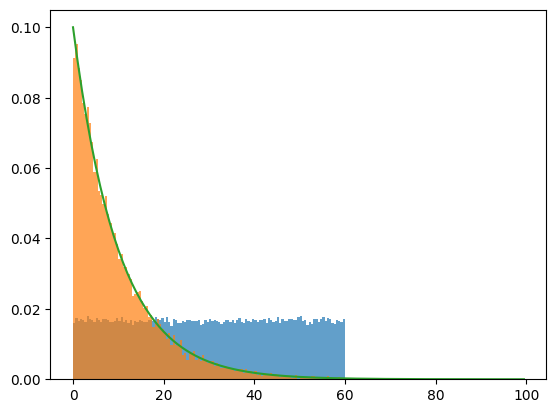

In [18]:
N = 100000
kappa = 0.1

xmax, ymax = 60, kappa

rx = xmax * np.random.random(N)  # np.random.random() samples from U([0,1]), so xmax * np.random.random() samples from U([0,xmax])
ry = ymax * np.random.random(N)

values = [] 
Nin = 0
for i in range(N):
    if(ry[i] <= kappa * np.exp(-kappa * rx[i])):
        Nin += 1
        values.append(rx[i])

print("Acceptance Ratio: ", Nin / N)

binwidth = 5 * kappa
plt.hist(rx, bins=np.arange(0., 100., binwidth), density=True, alpha=.7)
plt.hist(values, bins=np.arange(0., 100., binwidth), density=True, alpha=.7)
plt.plot(np.arange(0., 100., binwidth), kappa * np.exp(-kappa * np.arange(0, 100., binwidth)));

While this works, it is very expensive, since we might end up throwing away most of the points. A better way is the metropolis algorithm explained below.

### Random walk methods: the Metropolis algorithm
Suppose that we want to generate random variables according to an arbitrary probability density $P(x)$. The Metropolis algorithm produces
a “random walk” of points $\{x_i\}$ whose asymptotic probability approaches $P(x)$ after a large number of steps. The random walk is
defined by a “transition probability” $w(x_i \rightarrow x_j)$ for one value $x_i$ to another $x_j$ in order that the distribution of points
$x_0$, $x_1$, $x_2$, ... converges to $P(x)$. In can be shown that for this it is sufficient (but not necessary) to satisfy the “detailed balance”
condition 
$$p(x_i)w(x_i \rightarrow x_j) = p(x_j)w(x_j \rightarrow x_i).$$ 
This relation dos not specify $w(x_i \rightarrow x_j)$ uniquely. A simple choice is
$$w(x_i \rightarrow x_j)=\min{\left[ 1,\frac{P(x_j)}{P(x_i)} \right] }.$$
This choice can be described by the following steps. Suppose that the “random walker” is at a position $x_n$. To generate $x_{n+1}$ we

1.  choose a trial position $x_t=x_n+\delta _n$ , where the $\delta _n$
    is a random number in the interval $[-\delta ,\delta]$.

2.  Calculate $w=P(x_t)/P(x_n)$.

3.  If $w \geq 1$ we accept the change and let $x_{n+1}=x_t$.

4.  If $w \leq 1$, generate a random number $r$.

5.  If $r \leq w$, accept the change and let $x_{n+1} = x_t$.

6.  If the trial change is not accepted, the let $x_{n+1}=x_n$.

It is necessary to sample a number of points of the random walk before
the asymptotic probability $P(x)$ is attained. How do we choose the
“step size” $\delta$? If $\delta$ is too large, only a small fraction of
changes will be accepted and the sampling will be inefficient. If
$\delta$ is too small, a large number will be accepted, but it would
take too long to sample $P(x)$ over the whole interval of interest.
Ideally, we want at least 1/3-1/2 of the trial steps to be accepted. We
also want to choose $x_0$ such that the distribution $\{x_i\}$ converges
to $P(x)$ as quickly as possible. An obvious choice is to begin the
random walk at the point where $P(x)$ is maximum.

### Example: The Gaussian distribution
We use the Metropolis algorithm to generate a Gaussian distribution with zero mean and unit variance,
$$P(x)=\frac{1}{\sqrt{2\pi}} e^{-x^2/2}$$

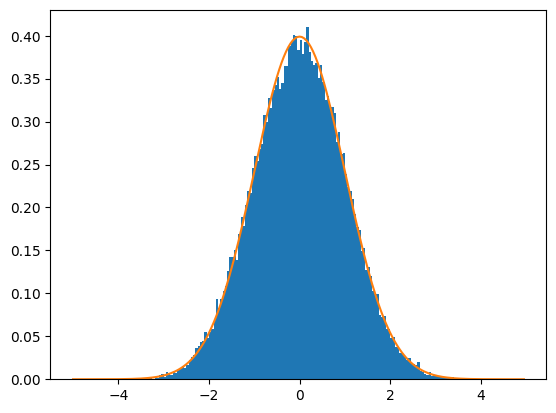

In [32]:
import numpy as np
from matplotlib import pyplot

N = 100000
x = np.zeros(N)
delta = 1.
sigma = 1/2

def metropolis(x, delta=1.):
    x_trial = x + np.random.uniform(-delta, delta)
    weight = np.exp(-0.5 * (x_trial**2)) / np.exp(-0.5 * (x**2))
    if weight >= 1:  # accept
        return x_trial
    else: 
        r = np.random.random()
        if r <= weight:  # accept 
            return x_trial
        else:  # reject
            return x

x_start = 0.
N_warmup = 1000
for i in range(N_warmup):
    x_start = metropolis(x_start, delta)

x[0] = x_start
for i in range(1, N):
    x[i] = metropolis(x[i-1], delta)

binwidth = sigma/10;
plt.hist(x, bins=np.arange(-5, 5, binwidth), density=True);
plt.plot(np.arange(-5, 5, binwidth), 1./np.sqrt(2*np.pi) * np.exp(-0.5 * np.arange(-5, 5, binwidth)**2));

## Monte Carlo Integration - Details

Imagine that we want to measure the area of a pond with arbitrary shape. Suppose that this pond is in the middle of a field with known area $A$. If we throw $N$ stones randomly, such that they land within the boundaries of the field, and we count the number of stones that fall in the pond $N_{in}$, the area of the pond will be approximately proportional to the fraction of stones that make a splash, multiplied by $A$: $$A_{pond}=\frac{N_{in}}{N}A.$$ This simple procedure is an example of the “Monte Carlo” method.


### Simple Monte Carlo integration
More generaly, imagine a rectangle of height $H$ in the integration interval $[a,b]$, such that the function $f(x)$ is within its boundaries. Draw $n$ pairs of random numbers $(x_i,y_i)$ such that they are uniformly distributed inside this rectangle. The fraction of points that fall within the area contained below $f(x)$, i.e., that satisfy $y_i \leq f(x_i)$ is an estimate of the ratio of the integral of $f(x)$ and the area of the rectangle. Hence, the estimate of the integral will be given by:
$$\int _a^b{f(x)dx} \simeq I(N) = \frac{N_{in}}{N}H(b-a).$$

Another Monte Carlo procedure is based on the definition:
$$\langle f \rangle=\frac{1}{(b-a)} \int _a^b{f(x)dx}.$$ 
In order to determine this average, we sample the value of $f(x)$:
$$\langle f \rangle \simeq \frac{1}{N}\sum_{i=1}^{N}f(x_i),$$ 
where the $N$ values $x_i$ are distributed uniformly in the interval $[a,b]$. The integral will be given by $$I(N)=(b-a) \langle f \rangle .$$


### Monte Carlo error analysis
Imagine that we perform several measurements of the integral, each of them yielding a result $I_n$. These values have been obtained with different sequences of $N$ random numbers. According to the central limit theorem, these values whould be Gaussian distributed around a mean $\langle I \rangle$. Suppouse that we have a set of $M$ of such measurements ${I_n}$. A convenient measure of the differences of these measurements is the "standard deviation of the means" $\sigma_M$:
$$\sigma_M ^2=\langle I^2 \rangle - \langle I \rangle ^2,$$ 
where
$$\langle I \rangle = \frac{1}{M} \sum_{n=1}^M I_n$$ 
and
$$\langle I^2 \rangle = \frac{1}{M} \sum_{n=1}^{M} I_n^2.$$ 
It can be proven that
$$\sigma_M \approx \sigma/\sqrt{N}.$$ 
This relation becomes exact in the limit of a very large number of measurements. Note that this expression implies that the error decreases with the square root of the number of trials, meaning that if we want to reduce the error by a factor 10, we need 100 times more points for the average.

## Comparison to the other methods

In [21]:
x0, x1, h = 0., 2., .1
n_pts = int((x1 - x0) / h)

def mc_int(x0, x1, f, n_pts):
    xs = (x1 - x0) * np.random.random(n_pts)  # uniform random points between 0 and 2
    return (x1 - x0) * np.mean(f(xs)) # (x1-x0) * <f> with <f>= 1/N \sum_i f(x_i)


print("Riemann Approximation: {:.4f}".format(riemann_int(x0, x1, f, h=.1)))
print("Trapezoidal Rule:      {:.4f}".format(trapezoid_int(x0, x1, f, h=.1)))
print("Simpson Rule:          {:.4f}".format(simpson_int(x0, x1, f, h=2)))
print("Simple Monte Carlo:    {:.4f}".format(mc_int(x0, x1, f, n_pts)))
print("Analytic result:       {:.4f}".format(1/3 * 2**3 + 2))


Riemann Approximation: 4.4700
Trapezoidal Rule:      4.6700
Simpson Rule:          4.6667
Simple Monte Carlo:    4.3304
Analytic result:       4.6667


## Example: Integrate $z^n$ along a circle of (fixed) radius $r$

If we let $z=re^{i\theta}$, then $dz=rde^{i\theta}=ire^{i\theta}d\theta$. Thus
$$\oint_C z^n dz =ir^{n+1}\int_0^{2\pi} e^{i(n+1)\theta}d\theta$$

In [52]:
# We set r=1, i.e., do this for the unit circle
theta0, theta1, h, n = 0., 2.*np.pi, 1e-6, 0
n_pts = int((x1 - x0) / h)

def f(x, n):
    return 1. * np.exp(1.j * (n + 1) * x)

def mc_int(x0, x1, f, n_pts, n):
    xs = (x1 - x0) * np.random.random(n_pts)  # uniform random points between 0 and 2 \pi
    return 1.j * (x1 - x0) * np.mean(f(xs, n)) # (x1-x0) * <f> with <f>= 1/N \sum_i f(x_i). The factor i comes from the measure as explained above

for n in range(-3, 3):
    print("\int f(z)=z^{:2d}: {:.4f}".format(n, mc_int(x0, x1, f, n_pts, n)))
    

\int f(z)=z^-3: 0.0016-0.0045j
\int f(z)=z^-2: -0.0036+0.0001j
\int f(z)=z^-1: 0.0000+6.2832j
\int f(z)=z^ 0: -0.0025+0.0014j
\int f(z)=z^ 1: 0.0017-0.0027j
\int f(z)=z^ 2: -0.0001-0.0011j


## Example: Gaussian moments

To illustrate some of the these ideas we will utilize a Gaussian integral. We write the Gaussian distribution as 
$$
P(x) = \exp(-a x^2/2)
$$ 
up to a normalization factor that must be imposed. With this convention, the $2n$ moment is given by
$$
\langle x^{2n} \rangle = \frac{(2n-1)!!}{a^n}
$$ 
where $n!!$ is the double factorial $n(n-2)(n-4)\dots 1$ and $(2n-1)!!$ admits a graphical interpretation as the number of ways to connect $2n$ points in pairs. This relation is at the foundation of Feynman diagram combinatorics in quantum field theory.

We will carry out these moment calculations using Monte Carlo integration. We will investigate convergence of the integrals, and also study "negative moments" which are divergent integrals; clearly Monte Carlo integration won't work in that case.


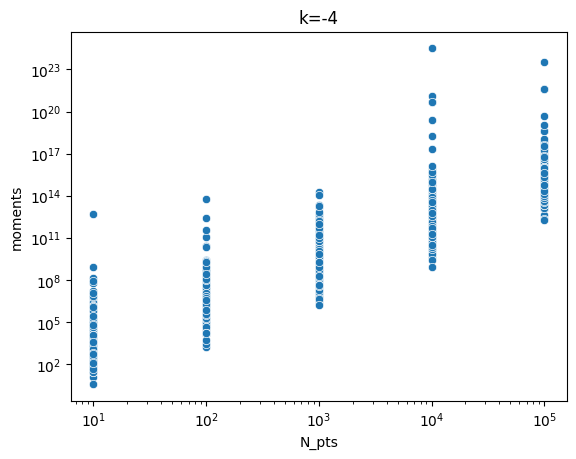

          k       moments
N_pts                    
10     -4.0  4.957918e+10
100    -4.0  5.764206e+11
1000   -4.0  3.788102e+12
10000  -4.0  3.213349e+22
100000 -4.0  3.291067e+21


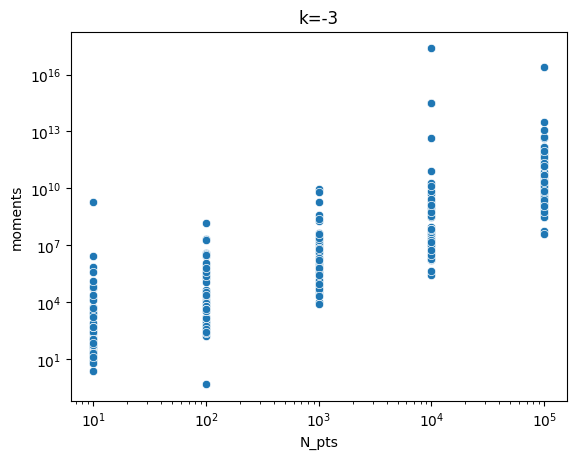

          k       moments
N_pts                    
10     -3.0  1.871434e+07
100    -3.0 -6.857733e+07
1000   -3.0  1.285428e+08
10000  -3.0  2.398148e+15
100000 -3.0  2.227115e+14


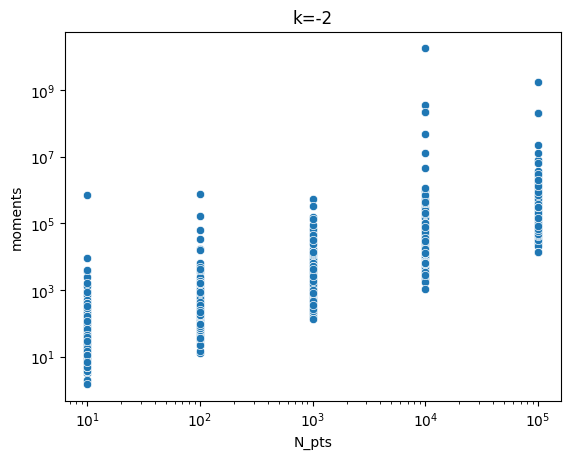

          k       moments
N_pts                    
10     -2.0  7.368988e+03
100    -2.0  1.107366e+04
1000   -2.0  2.124607e+04
10000  -2.0  1.883322e+08
100000 -2.0  2.297599e+07


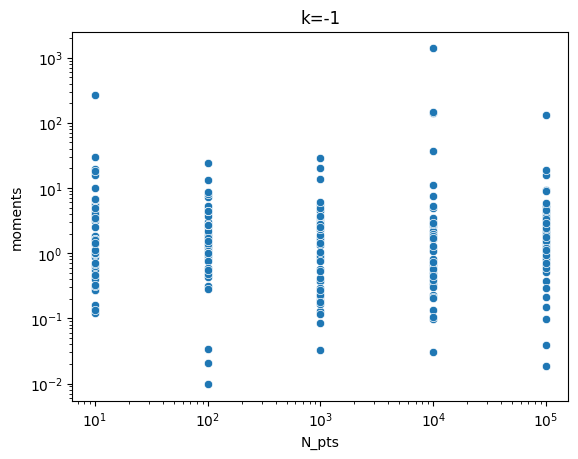

          k    moments
N_pts                 
10     -1.0   2.972923
100    -1.0  -0.577453
1000   -1.0   0.023581
10000  -1.0  13.836317
100000 -1.0   1.296685


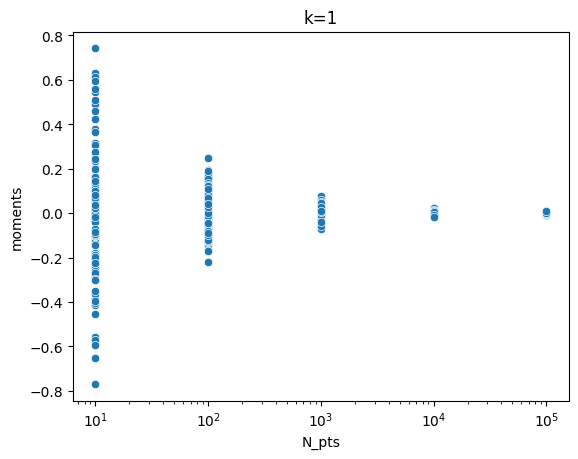

          k   moments
N_pts                
10      1.0 -0.005681
100     1.0  0.010328
1000    1.0  0.005113
10000   1.0  0.000336
100000  1.0 -0.000164


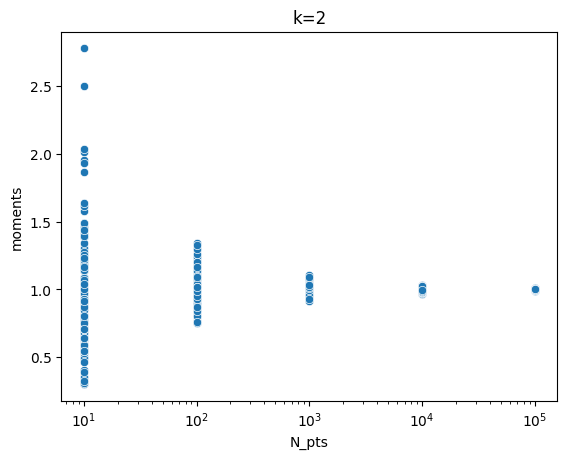

          k   moments
N_pts                
10      2.0  0.954415
100     2.0  1.022329
1000    2.0  0.998905
10000   2.0  1.001163
100000  2.0  1.000442


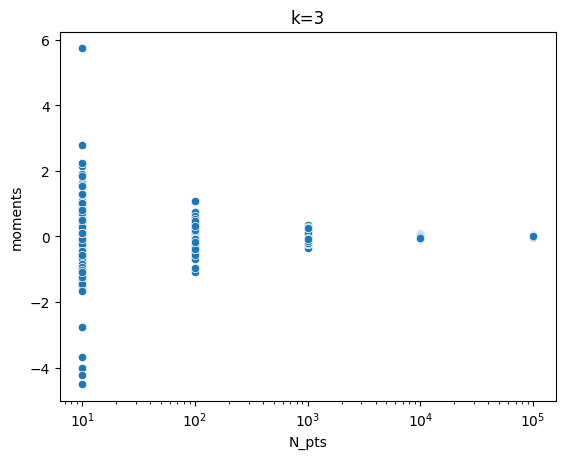

          k   moments
N_pts                
10      3.0 -0.076232
100     3.0  0.054849
1000    3.0  0.010846
10000   3.0  0.001005
100000  3.0 -0.000771


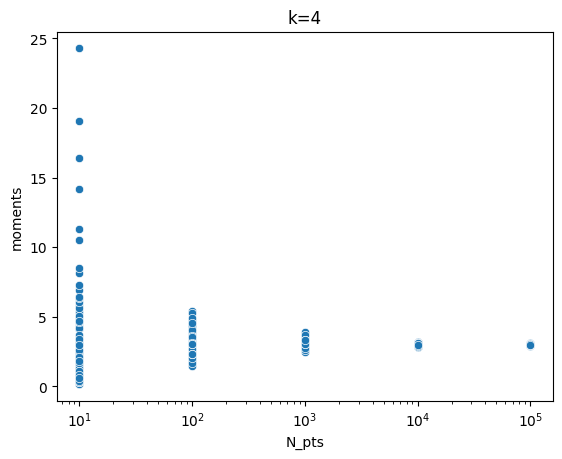

          k   moments
N_pts                
10      4.0  3.148602
100     4.0  3.089746
1000    4.0  3.010197
10000   4.0  3.007268
100000  4.0  3.004457


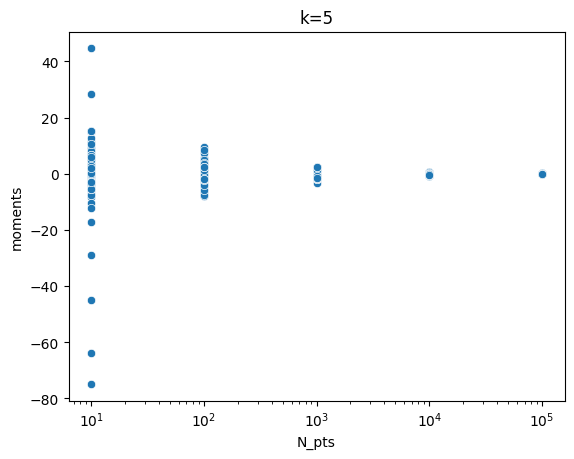

          k   moments
N_pts                
10      5.0 -1.298190
100     5.0  0.380117
1000    5.0  0.039417
10000   5.0 -0.013475
100000  5.0 -0.007026


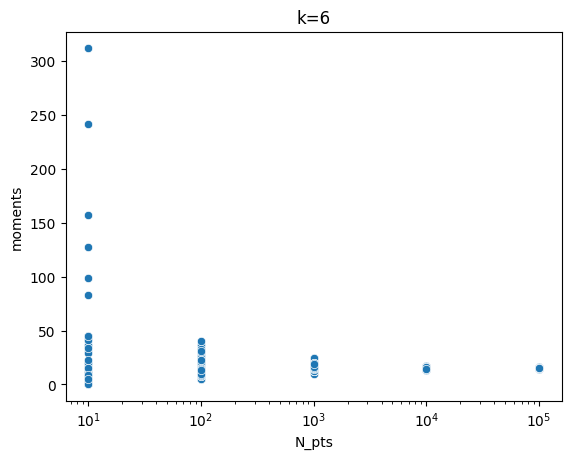

          k    moments
N_pts                 
10      6.0  19.324582
100     6.0  15.154459
1000    6.0  15.085002
10000   6.0  14.999989
100000  6.0  15.041183


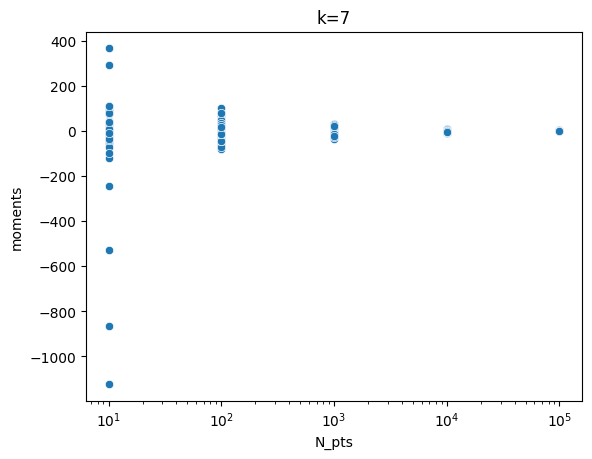

          k    moments
N_pts                 
10      7.0 -20.095484
100     7.0   3.005725
1000    7.0   0.308976
10000   7.0  -0.259038
100000  7.0  -0.089351


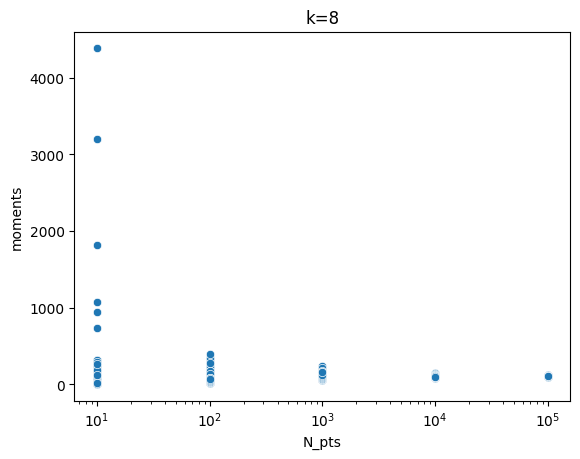

          k     moments
N_pts                  
10      8.0  168.890447
100     8.0  100.158343
1000    8.0  104.264535
10000   8.0  103.964368
100000  8.0  105.238373


In [1]:
import jax.numpy as jnp 
import jax.random as random
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 

# set up methods for computing moments 
N_exps, N_ptss = 100, [10**k for k in range(1, 6)]

def kth_gaussian_moments(k, N_pts, N_exps):
    key = random.PRNGKey(0)
    draws = random.normal(key, shape=(N_exps, N_pts))
    draws_k = draws**k 
    return jnp.mean(draws_k, axis=1)

# compute the moments and store the data
data_dict = {'k':[], 'N_pts':[], 'moments':[]}
ks = [-4, -3, -2, -1] + list(range(1,9))
for N_pts in N_ptss:
    for k in ks:
        draws = kth_gaussian_moments(k, N_pts, N_exps)
        data_dict['moments'].extend(draws)
        data_dict['k'].extend([k] * N_exps)
        data_dict['N_pts'].extend([N_pts] * N_exps)

# data_dict['moments'] = [float(k) for k in data_dict['moments']]

data = pd.DataFrame(data_dict)
data = data.astype({'moments': 'float', 'k': 'int32', 'N_pts': 'int32'})

# plot the data and demonstrate convergence 
for k in ks:
    sns.scatterplot(x='N_pts', y='moments', data=data.loc[data['k'] == k])
    if k < 0:
        plt.yscale('log')
    plt.xscale('log')
    plt.title('k={:}'.format(k))
    plt.show()

    mean_of_moments_largest_models = data.loc[data['k'] == k].groupby('N_pts').mean()
    print(mean_of_moments_largest_models)